<h1><center> <span style="color:blue"> Apollo Hospitals - Hypothesis Testing</span> </center></h1>

# `About Apollo Hospitals:`
Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.

# `Problem Statement:`
The company wants to know:
- Which variables are significant in predicting the reason for hospitalization for different regions
- How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

# `Data Observation:`

In [80]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import math
import scipy.stats as st
import re

from scipy.stats import ttest_ind, f_oneway, kruskal, ttest_ind # numeric Vs catogerical
from scipy.stats import chi2_contingency # categorical Vs categorical
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric
from scipy.stats import kstest # cdf
from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples 

import warnings
warnings.filterwarnings('ignore')
from colored import fg

In [81]:
# importing data
apollo = pd.read_csv("C:/Users/Rajeshri Jogi/Desktop/PROJECTS/7. Apollo/scaler_apollo_hospitals.csv")

In [82]:
# check the shape
apollo.shape

(1338, 8)

In [83]:
# check the head(3)
apollo.head(3)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124


In [84]:
# check the statistical distribution of numerical features
apollo.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [85]:
# check the dtype, null valuess, size of data
apollo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [86]:
# check total null values in the data
apollo.isnull().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [87]:
#check if any duplicated rows in the data
apollo.duplicated().value_counts()

False    1338
dtype: int64

# `Preprocessing the Data:`

In [88]:
# deep copy of oroginal data
data = apollo.copy(deep = True)

In [89]:
# drop unwanted columns
data.drop("Unnamed: 0",axis =1, inplace = True)

In [90]:
# check head 2 rows
data.head(2)

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314


In [91]:
# change the data type of columns wherever needed
for col in ['sex', 'smoker', 'region', 'severity level']:
    data[col] = data[col].astype('category')

In [92]:
# confirming the change in dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1338 non-null   int64   
 1   sex                      1338 non-null   category
 2   smoker                   1338 non-null   category
 3   region                   1338 non-null   category
 4   viral load               1338 non-null   float64 
 5   severity level           1338 non-null   category
 6   hospitalization charges  1338 non-null   int64   
dtypes: category(4), float64(1), int64(2)
memory usage: 37.4 KB


In [93]:
# change the string(object) dtype case to lower
data.apply(lambda x: x.astype(str).str.lower())

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.3,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.0,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.6,0,5020


In [94]:
# reconfirm the data shape
data.shape

(1338, 7)

In [95]:
# check the statistical distribution of numerical features
data.describe()

,age,viral load,hospitalization charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,33176.058296
std,14.049960,2.032796,30275.029296
min,18.000000,5.320000,2805.000000
25%,27.000000,8.762500,11851.000000
50%,39.000000,10.130000,23455.000000
75%,51.000000,11.567500,41599.500000
max,64.000000,17.710000,159426.000000


In [96]:
# check the statistical distribution of categorical features
data.describe(include = "category")

,sex,smoker,region,severity level
count,1338,1338,1338,1338
unique,2,2,4,6
top,male,no,southeast,0
freq,676,1064,364,574


# `Features:`

In [97]:
# create age bins for better visualization and analysis
bins = [17,28,38,48,58,64]
labels = ["17-28","29-38","39-48","49-58","59-64"]
data["age_bin"] = pd.cut(x = data["age"],bins=bins, labels = labels)
data[["age","age_bin"]].head()

,age,age_bin
0,19,17-28
1,18,17-28
2,28,17-28
3,33,29-38
4,32,29-38


# `Outliers:`

In [98]:
# Treating outliers in Hositalization charges
q1 = data['hospitalization charges'].quantile(0.25)
q3 = data['hospitalization charges'].quantile(0.75)
iqr = q3-q1

df = data[(data['hospitalization charges']>(q1-1.5*iqr) ) & (data['hospitalization charges']<(q3+1.5*iqr))]

In [99]:
df.shape

(1199, 8)

# `EDA:`

## `Univariate Analysis:`

Text(0.5, 1.0, 'No. of Hospitalised Patient as per the Age bracket')

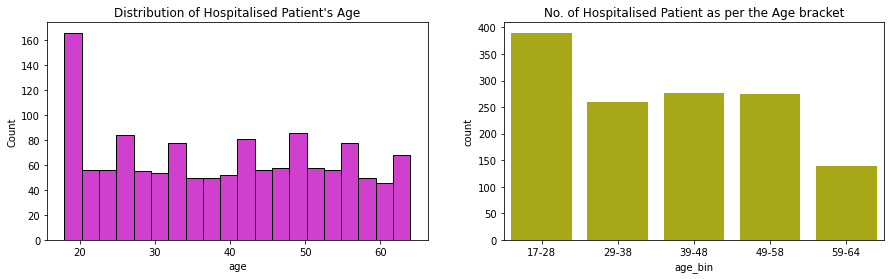

In [100]:
# checking distribution of age and count as per the age bin created
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data["age"], color ="m", bins = 20)
plt.title("Distribution of Hospitalised Patient's Age")

plt.subplot(1,2,2)
sns.countplot(data["age_bin"], color = "y")
plt.title("No. of Hospitalised Patient as per the Age bracket")

### <span style="color:green">**INSIGHTS:** </span>
- Highest no of patients are from below 20yrs
- Lowest patients are from 59-64yrs.

Text(0.5, 1.0, 'No. of Hospitalized somker and non-smoker')

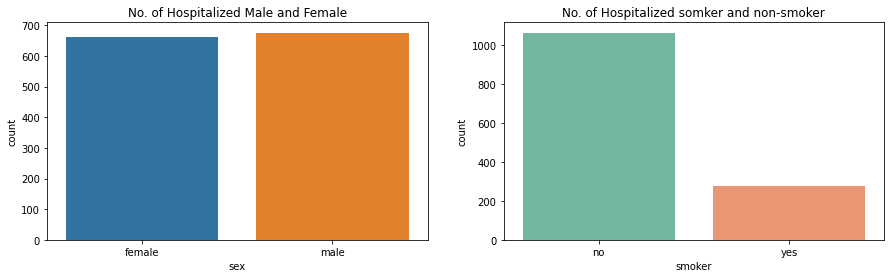

In [101]:
# male and female count in data, smoker and non-smoker count in data
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = data, x ="sex")
plt.title("No. of Hospitalized Male and Female")

plt.subplot(1,2,2)
sns.countplot(data = data, x ="smoker", palette = "Set2")
plt.title("No. of Hospitalized somker and non-smoker")

In [102]:
print(data["sex"].value_counts())
print(data["smoker"].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


### <span style="color:green">**INSIGHTS:** </span>
- Male and Female count is almost the same.
- Non-smokers count is greater than smokers, **ratio of non-smoker to smoker is 1:4**

Text(0.5, 1.0, "No. of Hospitalized Patient's Severity level")

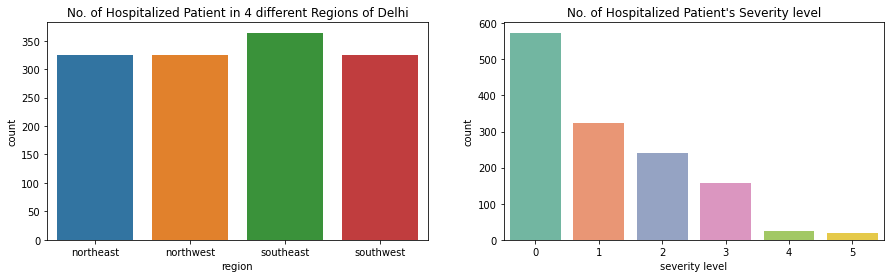

In [103]:
# count of patients from different regions, and count of severity level 
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = data, x ="region")
plt.title("No. of Hospitalized Patient in 4 different Regions of Delhi")

plt.subplot(1,2,2)
sns.countplot(data = data, x ="severity level", palette = "Set2")
plt.title("No. of Hospitalized Patient's Severity level")

### <span style="color:green">**INSIGHTS:** </span>
- Highest patients are from **Southeast region of Delhi**
- Severity level of most the paitent was **level 0**

Text(0.5, 1.0, 'Distribution of Hopitalization charges')

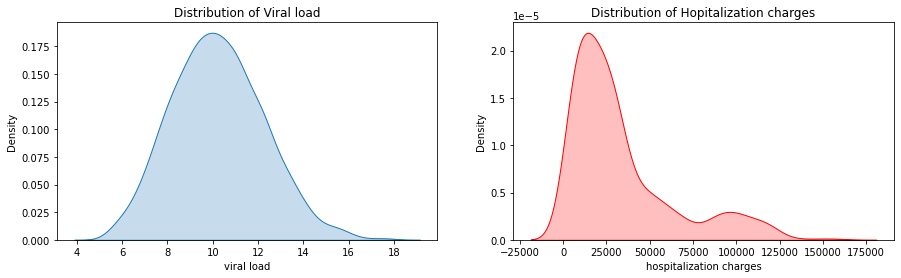

In [104]:
#check the distribution of viral load and hospitalization charges 
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(data["viral load"], shade = True)
plt.title("Distribution of Viral load")

plt.subplot(1,2,2)
sns.kdeplot(data["hospitalization charges"],shade = True, color = "r")
plt.title("Distribution of Hopitalization charges")

### <span style="color:green">**INSIGHTS:** </span>
- Viral load is normally distributed
- Hospitalization charges is right skewed and has outliers in it



## `Bivariate Analysis:`

Text(0.5, 1.0, 'Count of smoker and non smoker in male and female')

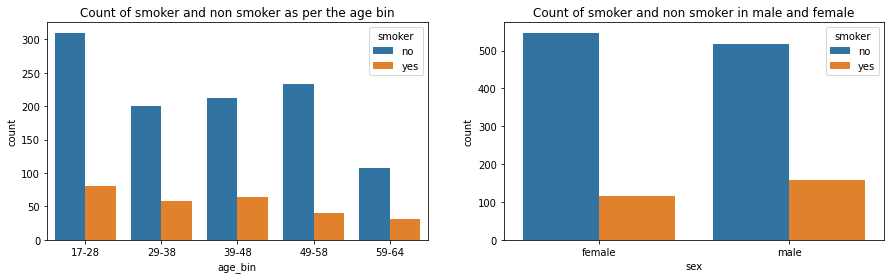

In [105]:
# smoker as per the age and sex
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = data, x = "age_bin", hue = "smoker")
plt.title("Count of smoker and non smoker as per the age bin")
    
plt.subplot(1,2,2)
sns.countplot(data = data, x = "sex", hue = "smoker")
plt.title("Count of smoker and non smoker in male and female")

### <span style="color:green">**INSIGHTS:** </span>
- Most of the smokers belog to age group 17-28yrs
- There are more male smoker compared to female


Text(0.5, 1.0, 'Sevrity level in male and female')

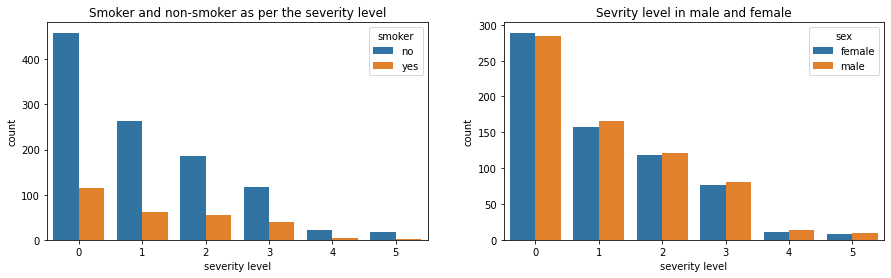

In [106]:
# smoker and non-smoker severity level and severity level of male and female
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = data, x = "severity level", hue = "smoker")
plt.title("Smoker and non-smoker as per the severity level")

plt.subplot(1,2,2)
sns.countplot(data = data, x = "severity level", hue = "sex")
plt.title("Sevrity level in male and female")

### <span style="color:green">**INSIGHTS:** </span>
- Severity level has no relation with smoker and non-smoker
- Severity level among both the gender is almost same.

Text(0.5, 1.0, 'Severity level as per the age_bin')

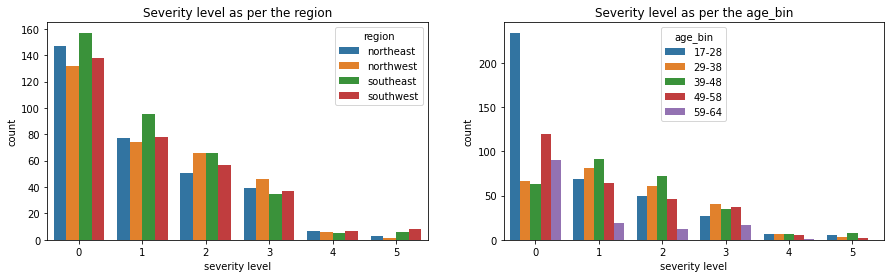

In [107]:
# Severity level as per the age and region
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = data, x = "severity level", hue = "region")
plt.title("Severity level as per the region")

plt.subplot(1,2,2)
sns.countplot(data = data, x = "severity level", hue = "age_bin")
plt.title("Severity level as per the age_bin")

### <span style="color:green">**INSIGHTS:** </span>
- Severity level 4 & 5 is most seen in Southwest region
- Severty level is 5 is seen most in age group between 39-48yrs

Text(0.5, 1.0, 'Age distribution as per the region')

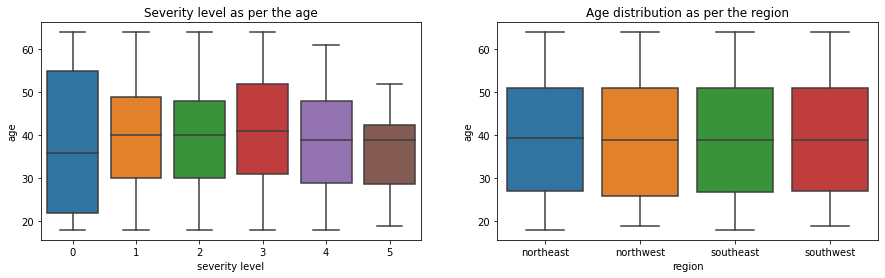

In [108]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = "severity level", y = "age")
plt.title("Severity level as per the age")

plt.subplot(1,2,2)
sns.boxplot(data = data, x = "region", y = "age")
plt.title("Age distribution as per the region")

### <span style="color:green">**INSIGHTS:** </span>
- Median of severity level 1,2,3 is 40-42yrs
- Median of severity level 4 & 5 is 38-39yrs
- Median od severity level 0 is 36-37yrs
- Age is disctributed equally among all the regions

Text(0.5, 1.0, 'Region relation with hospitalization charges')

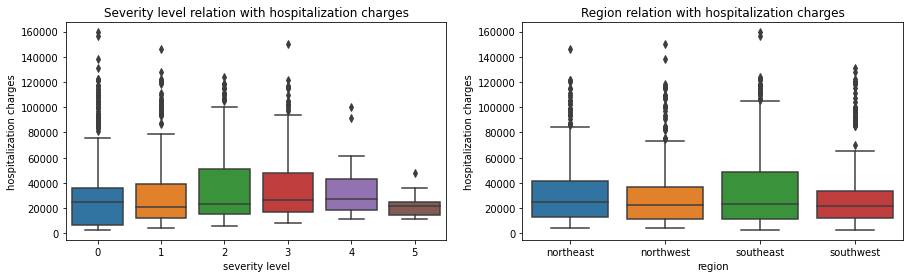

In [109]:
# Severity level relation with hospitalization charges and region relation with hospitalization charges
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = "severity level", y = "hospitalization charges")
plt.title("Severity level relation with hospitalization charges")

plt.subplot(1,2,2)
sns.boxplot(data = data, x = "region", y = "hospitalization charges")
plt.title("Region relation with hospitalization charges")

### <span style="color:green">**INSIGHTS:** </span>
- Highest Hospitalization charges median can be seen is severity level 3 & 4
- Southeast Hospitalization charges are comparitvely higher due to no. of cases in the region.


Text(0.5, 1.0, 'Relation between Severity level and viral load')

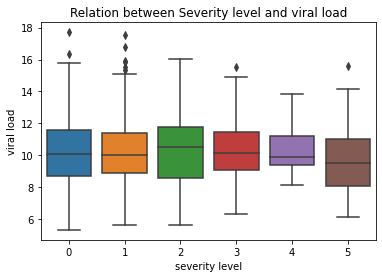

In [110]:
# Severity level and viral load relation
sns.boxplot(data = data, x = "severity level", y = "viral load")
plt.title("Relation between Severity level and viral load")

### <span style="color:green">**INSIGHTS:** </span>
- Acrosss the severity level median between 10-11 viral load.

Text(0.5, 1.0, 'Realtion between Hospitalization charges and Viral Load')

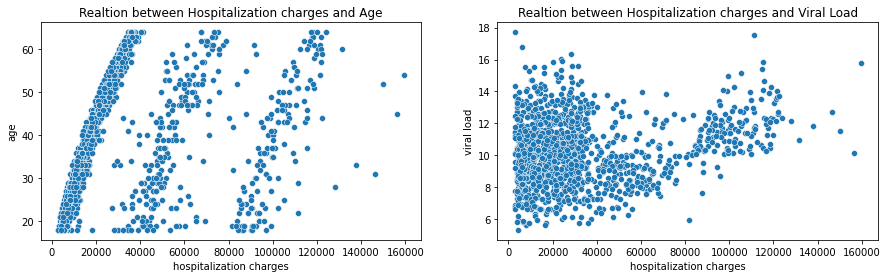

In [111]:
#Hospitalization charges relation with age and viral laod
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot(data = data, y = "age", x = "hospitalization charges")
plt.title("Realtion between Hospitalization charges and Age")

plt.subplot(1,2,2)
sns.scatterplot(data = data, y = "viral load", x = "hospitalization charges")
plt.title("Realtion between Hospitalization charges and Viral Load")

### <span style="color:green">**INSIGHTS:** </span>
- Age and hospitalization charges has not much relation
- Most the cases which has Hospitalization charges 1L and above has a viral load above 9.

# `Multivariate Analysis:`

Text(0.5, 1.0, 'Severity level and viral load with gender')

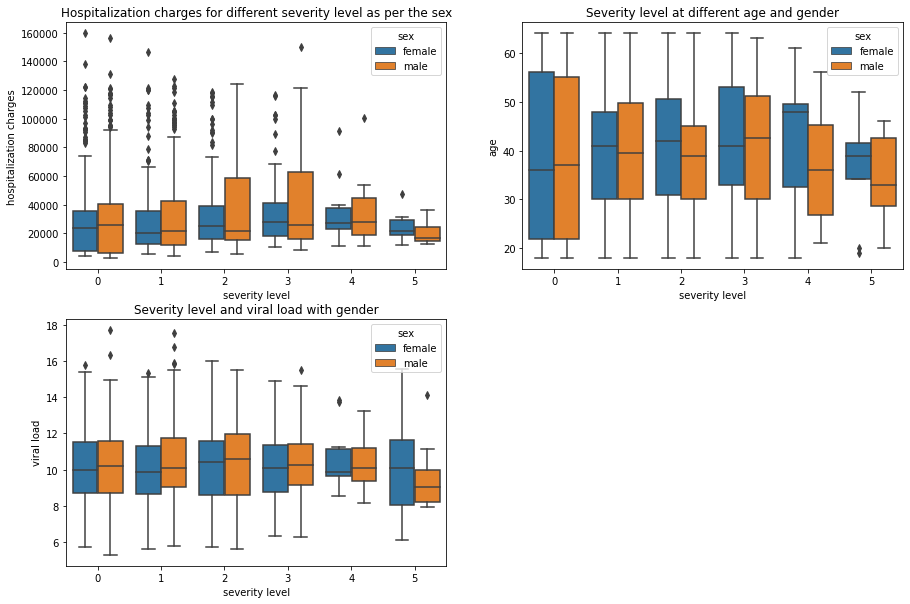

In [112]:
# Severity level relation with age, sex, hospitalization charges
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data = data, x = "severity level", y = "hospitalization charges", hue = "sex")
plt.title("Hospitalization charges for different severity level as per the sex")

plt.subplot(2,2,2)
sns.boxplot(data = data, x = "severity level", y = "age", hue = "sex")
plt.title("Severity level at different age and gender")

plt.subplot(2,2,3)
sns.boxplot(data = data, x = "severity level", y = "viral load", hue = "sex")
plt.title("Severity level and viral load with gender")

### <span style="color:green">**INSIGHTS:** </span>
- Hospitalization charges of female is more than male at severity level 5.
- At Severity level 4 median age of female is 49yrs and male median age is 37yrs
- At Severity level 5 median age of female is 39yrs and male median age is 34yrs
- At Severity level 4 median viral load of female is 9.8 and male is 10.3
- At Severity level 5 median viral load of female is 10.3 and male is 9

Text(0.5, 1.0, 'Severity level, hospitalization charges and region')

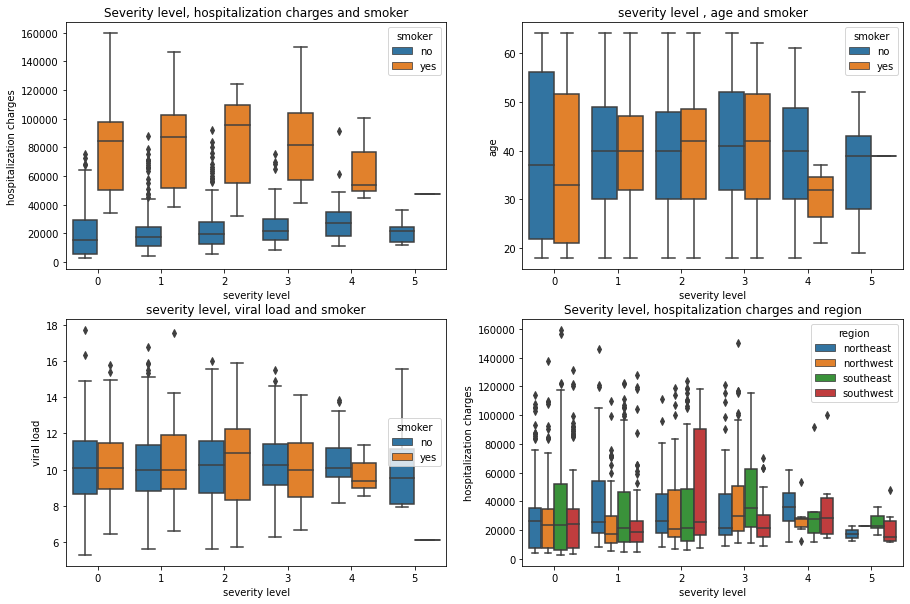

In [113]:
# Severity level relation with hospitalization charges, smoker, region and age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data = data, x = "severity level", y = "hospitalization charges", hue = "smoker")
plt.title("Severity level, hospitalization charges and smoker")

plt.subplot(2,2,2)
sns.boxplot(data = data, x = "severity level", y = "age", hue = "smoker")
plt.title("severity level , age and smoker")

plt.subplot(2,2,3)
sns.boxplot(data = data, x = "severity level", y = "viral load", hue = "smoker")
plt.title("severity level, viral load and smoker")

plt.subplot(2,2,4)
sns.boxplot(data = data, x = "severity level", y = "hospitalization charges", hue = "region")
plt.title("Severity level, hospitalization charges and region")

### <span style="color:green">**INSIGHTS:** </span>
- Hospitalizzation charges for smokers is greater than non-smokers and highest can be seen in severity level 3
- Severity level 4 is seen most in smokers with median age 32yrs
- Otherwise age across severity level median is 39-40yrs
- Southeast and southwest has the highest hospitalization charges.

Text(0.5, 1.0, 'Hospitalization charges as per the age and region')

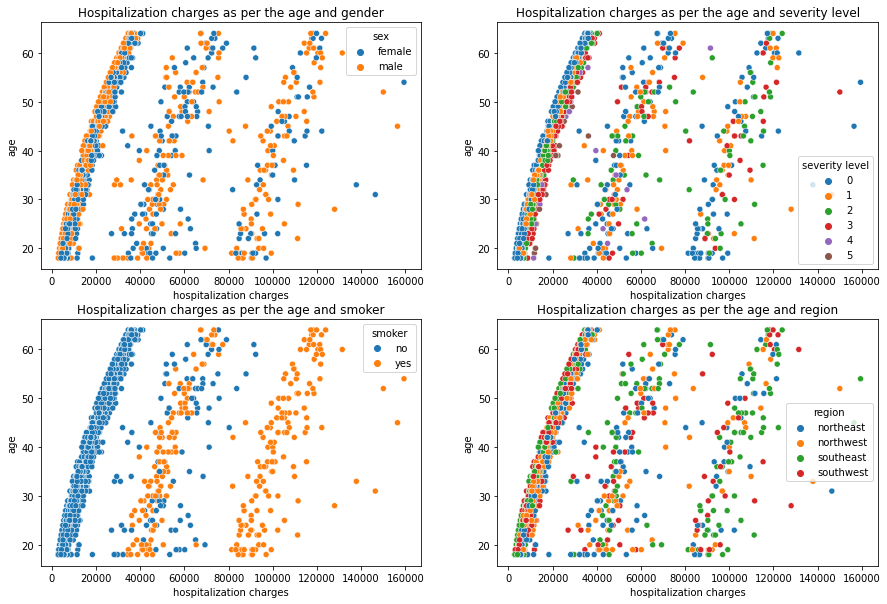

In [114]:
# scatter plot for hopitalization charges with age and other categorical features
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(data = data, x = "hospitalization charges", y = "age", hue = "sex")
plt.title("Hospitalization charges as per the age and gender")

plt.subplot(2,2,2)
sns.scatterplot(data = data, x = "hospitalization charges", y = "age", hue = "severity level")
plt.title("Hospitalization charges as per the age and severity level")

plt.subplot(2,2,3)
sns.scatterplot(data = data, x = "hospitalization charges", y = "age", hue = "smoker")
plt.title("Hospitalization charges as per the age and smoker")

plt.subplot(2,2,4)
sns.scatterplot(data = data, x = "hospitalization charges", y = "age", hue = "region")
plt.title("Hospitalization charges as per the age and region")

### <span style="color:green">**INSIGHTS:** </span>
- Hospitalization charges are more in age group 40-50yrs
- Hospitalization charges among male is more compared to female
- It clearly shows that hospitalization charges are more in smokers comapred to female

Text(0.5, 1.0, 'Hospitalization charges with age and region')

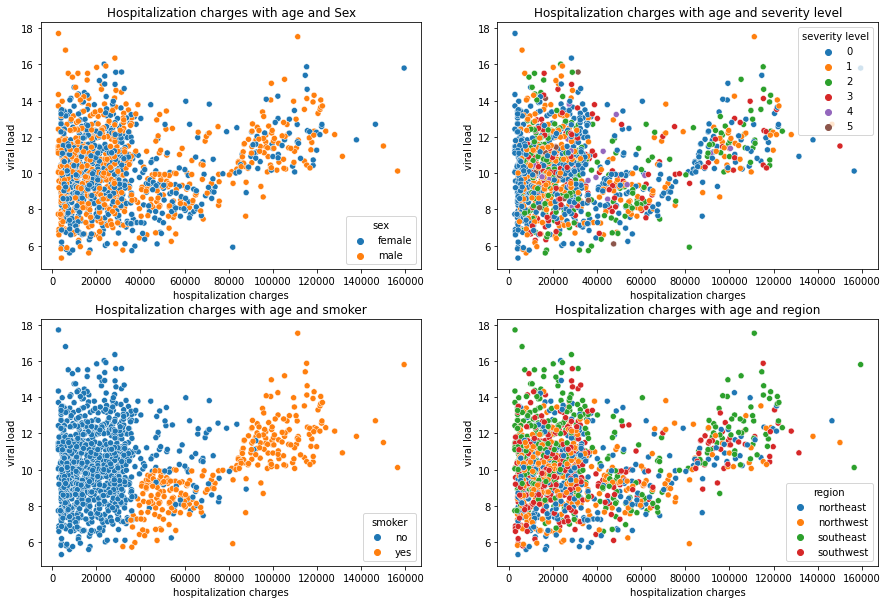

In [115]:
# scatter plot for hospitalization charges with age and other categorical features
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(data = data, x = "hospitalization charges", y = "viral load", hue = "sex")
plt.title("Hospitalization charges with age and Sex")

plt.subplot(2,2,2)
sns.scatterplot(data = data, x = "hospitalization charges", y = "viral load", hue = "severity level")
plt.title("Hospitalization charges with age and severity level")

plt.subplot(2,2,3)
sns.scatterplot(data = data, x = "hospitalization charges", y = "viral load", hue = "smoker")
plt.title("Hospitalization charges with age and smoker")

plt.subplot(2,2,4)
sns.scatterplot(data = data, x = "hospitalization charges", y = "viral load", hue = "region")
plt.title("Hospitalization charges with age and region")

### <span style="color:green">**INSIGHTS:** </span>
- Male with viral load 9-10 have more hospitalization charges to female
- Region southeast and southwest has more hospitization charges with viral load between 12-14
- Smokers with viral load between 10-15 viral load has the highest hospitalization charges
- Severity level 3 and 0 has more outliers with higher hospitalization charges.

Text(0.5, 1.0, 'severity level woth viral and region')

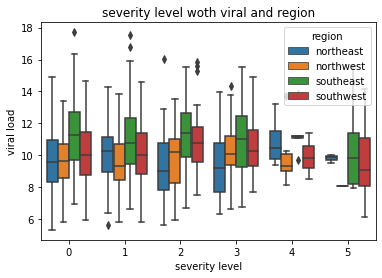

In [116]:
# Boxplot of severity level woth viral and region
sns.boxplot(data = data, x = "severity level", y = "viral load", hue = "region")
plt.title("severity level woth viral and region")

### <span style="color:green">**INSIGHTS:** </span>
- Viral load in southeast region has a higher median compared to other regions.
- Severity level 4 and 5 has only the patients from region southeast and southwest
- Lowest severity level is seen in notheast region

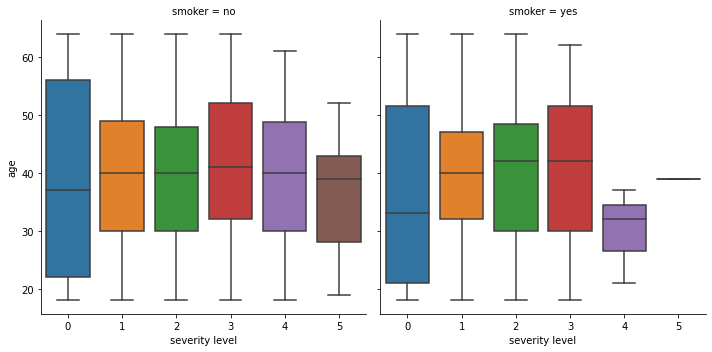

In [117]:
# factorplot age, severity level, smoker
sns.factorplot(data = data, y = "age", x = "severity level", col ="smoker", kind = "box")

### <span style="color:green">**INSIGHTS:** </span>
- Paitient who is a smoker and at severity belong to age 32-33yrs. 


# `Hypothesis Testing:`

## `1. Prove: The hospitalization of people who do smoking is greater than those who don't.`
- H0: Hospitalization charges of smoker <= Hopitalization charges of non-smoker
- H1: Hospitalization charges of smoker > Hopitalization charges of non-smoker
- **Test: T-test Right tailed**
- Test statistic: 46.664892 
- P-value for Right tailed test: 0.000000
- Conculsion: Since **p-value(=0.000000) < alpha(=0.05)**. 

<span style="color:red">**We REJECT the Null Hypothesis H0.**</span>

<span style="color:red">**And we conclude that Hospitalization charges of people who smoker is greater than non-smoker.**</span>

In [118]:
# extracting the smoker and non-smoker data with hospitalization charges
smoker = data[data["smoker"]=="yes"]["hospitalization charges"]
non_smoker = data[data["smoker"]=="no"]["hospitalization charges"]

In [119]:
# check the mean, variance and len of the data
print('No. of smokers = '+ str(len(smoker)))
print('No. of non-smokers = '+ str(len(non_smoker)))
print()
print('Mean of Hospitalization charges of smoker:' + str(smoker.mean()))
print('Mean of Hospitalization charges of non-smoker:' + str(non_smoker.mean()))
print()
print('Variance of Hospitalization charges of smoker:' + str(smoker.var()))
print('Variance of Hospitalization charges of non-smoker:' + str(non_smoker.var()))

No. of smokers = 274
No. of non-smokers = 1064

Mean of Hospitalization charges of smoker:80125.57299270073
Mean of Hospitalization charges of non-smoker:21085.6757518797

Variance of Hospitalization charges of smoker:832547033.7254218
Variance of Hospitalization charges of non-smoker:224533906.64452907


### `Why Right ttest tailed?`
- As the mean for the both categories is different and even the variance is not equivalent, we use right tailed test to check if smoker's hospitalization charges are greater than non-smoker.
- Below histogram shows the distribution is not perfect normal distribution.

Text(0.5, 1.0, 'Non-smoker hospitalization charges distribution')

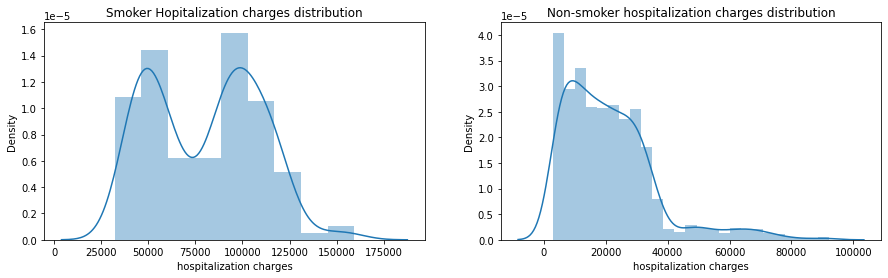

In [120]:
# plot the data in histogram to check the normality of the data 
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(smoker)
plt.title("Smoker Hopitalization charges distribution")

plt.subplot(1,2,2)
sns.distplot(non_smoker)
plt.title("Non-smoker hospitalization charges distribution")

In [121]:
# ttest right tailed test
t_value,p_value = st.ttest_ind(smoker,non_smoker, alternative = "greater")
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for right tailed test is %f'%p_value)
alpha = 0.05

if p_value<=alpha:
    print('Conclusion:','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. And we conclude that Hospitalization charges of people who smoke is greater than who don't.''')

else:
    print('Conclusion:','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')

Test statistic is 46.664892
p-value for right tailed test is 0.000000
Conclusion: Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. And we conclude that Hospitalization charges of people who smoke is greater than who don't.


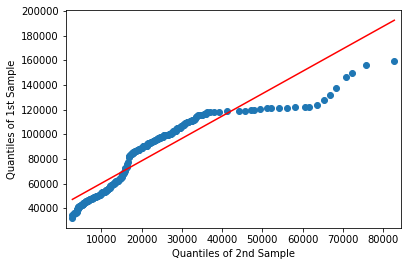

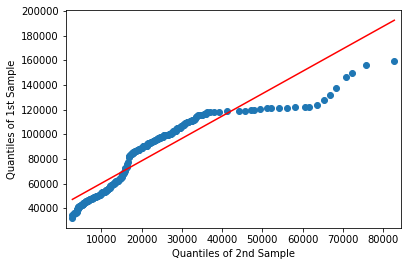

In [122]:
# qqplot to visually analyse the variance in both data
qqplot_2samples(smoker,non_smoker, line = "r")

In [123]:
# levene test to reconfirm the hypothesis test
levene(smoker, non_smoker)

LeveneResult(statistic=332.6132009308764, pvalue=1.5595259401311176e-66)

## `2. Prove: The viral load of Females is different from that of Males`
- H0: Viral Load of Female = Viral Load of Male
- H1: Viral Load of Female != Viral Load of Male
- Test: T-test two tailed
- Test statistic: -1.695711
- P-value for Two tailed test: 0.090174
- Conculsion: Since p-value **(=0.090174) > alpha(=0.05)** 

<span style="color:red">**We FAIL to Reject the null hypothesis H0.**</span>

<span style="color:red">**And We conclude that viral load is similar in Male and Female patients.**</span>

In [124]:
# checking the variable values in it
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [125]:
# extracting the required data from processes data
female = data[data["sex"]=="female"]["viral load"]
male = data[data["sex"]=="male"]["viral load"]

In [126]:
print('No. of Feamle = '+ str(len(female)))
print('No. of Male = '+ str(len(male)))
print()
print('Mean of Female viral load:' + str(female.mean()))
print('Mean of Male viral load:' + str(male.mean()))
print()
print('Variance of Female viral load:' + str(female.var()))
print('Variance of Male viral load:' + str(male.var()))

No. of Feamle = 662
No. of Male = 676

Mean of Female viral load:10.12607250755287
Mean of Male viral load:10.314423076923076

Variance of Female viral load:4.061844158123506
Variance of Male viral load:4.189755370370371


<AxesSubplot:xlabel='viral load', ylabel='Density'>

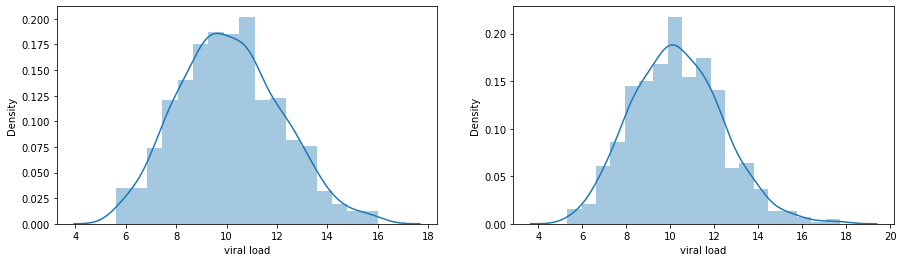

In [127]:
# check distribution of viral load in male and female
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(female)
    
plt.subplot(1,2,2)
sns.distplot(male)

In [128]:
# two tail ttest to prove the hypothesis testing
t_value,p_value = st.ttest_ind(female,male)
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)
alpha = 0.05

if p_value<=alpha:
    print('Conclusion:','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.''')
else:
    print('Conclusion:','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. We conclude that viral load is similar in Male and Female patients.''')

Test statistic is -1.695711
p-value for two tailed test is 0.090174
Conclusion: Since p-value(=0.090174) > alpha(=0.05) We do not reject the null hypothesis H0. We conclude that viral load is similar in Male and Female patients.


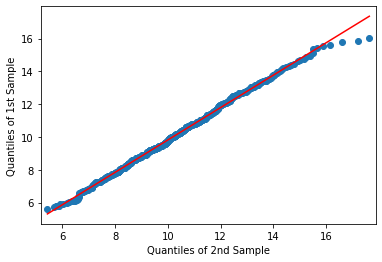

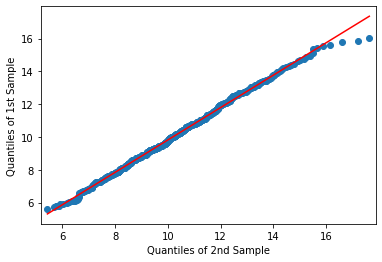

In [129]:
# qqplot to visualize the variance in male and female viral load
qqplot_2samples(female,male, line ="r")

In [130]:
# levene test to reconfirm the ttest was correct or not
levene(female,male)

LeveneResult(statistic=0.0038754151966871046, pvalue=0.9503708012456551)

## `3. Proportion of Smoking is different among different Regions?` 
- H0: Smoking proportion is same in all regions.
- H1: Smoking proportion is different in aleast one region.
- Test: Chi-Sqaure
- Test statistic: -1.695711
- P-value: 0.061720
- Conculsion: Since p-value **(=0.061720) > alpha(=0.05)** 

<span style="color:red"> **We FAIL to Reject the null hypothesis H0.**</span>

<span style="color:red"> **We conclude that smoking proportion is SAME in all Regions.**</span>

In [131]:
ct = pd.crosstab(data["smoker"], data["region"])
ct

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [146]:
stat, p_value, dof, expected = chi2_contingency(ct)
print('Test statistic is %f'%float("{:.6f}".format(stat)))
print('p-value for Chi-Square test is %f'%p_value)
alpha = 0.05

if p_value<=alpha:
    print('Conclusion:','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.''')
else:
    print('Conclusion:','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')

Test statistic is 7.343478
p-value for Chi-Square test is 0.061720
Conclusion: Since p-value(=0.061720) > alpha(=0.05) We do not reject the null hypothesis H0.


## `4. The mean viral load of Women with Severity Level 0, 1 and 2 the same? ` 
- H0: Mean of Women's viral load with severity level 0,1,2 is similar/same.
- H1: Mean of Women's viral load with severity level 0,1,2 is different.
- Test: ANOVA
- Test statistic: 0.335506
- P-value for ANOVA test: 0.715119
- Conculsion: Since p-value **p-value(=0.715119) > alpha(=0.05)** 

<span style="color:red"> **We FAIL to reject the null hypothesis H0.**</span>
    
<span style="color:red">**We conclude that mean of women's viral load with severity level 0,1,2 is the SAME**</span>

In [133]:
# get the women data from original data
women = apollo[apollo["sex"]=="female"]

In [134]:
# extract severity level 0,1,2
sl_0 = women[women["severity level"]==0]["viral load"]
sl_1 = women[women["severity level"]==1]["viral load"]
sl_2 = women[women["severity level"]==2]["viral load"]

In [135]:
# check mean, variance and length of the data
print('No. of Female with severity level 0: '+ str(len(sl_0)))
print('No. of Female with severity level 1: '+ str(len(sl_1)))
print('No. of Female with severity level 2: '+ str(len(sl_2)))
print()
print('Mean of Viral load of Female with severity level 0:' + str(sl_0.mean()))
print('Mean of Viral load of Female with severity level 1:' + str(sl_1.mean()))
print('Mean of Viral load of Female with severity level 2:' + str(sl_2.mean()))
print()
print('Variance of Viral load of Female with severity level 0:' + str(sl_0.var()))
print('Variance of Viral load of Female with severity level 1:' + str(sl_1.var()))
print('Variance of Viral load of Female with severity level 2:' + str(sl_2.var()))

No. of Female with severity level 0: 289
No. of Female with severity level 1: 158
No. of Female with severity level 2: 119

Mean of Viral load of Female with severity level 0:10.120726643598616
Mean of Viral load of Female with severity level 1:10.017468354430381
Mean of Viral load of Female with severity level 2:10.216806722689073

Variance of Viral load of Female with severity level 0:3.9564046784890428
Variance of Viral load of Female with severity level 1:3.7212929130049175
Variance of Viral load of Female with severity level 2:4.8827151402934055


<AxesSubplot:xlabel='viral load', ylabel='Density'>

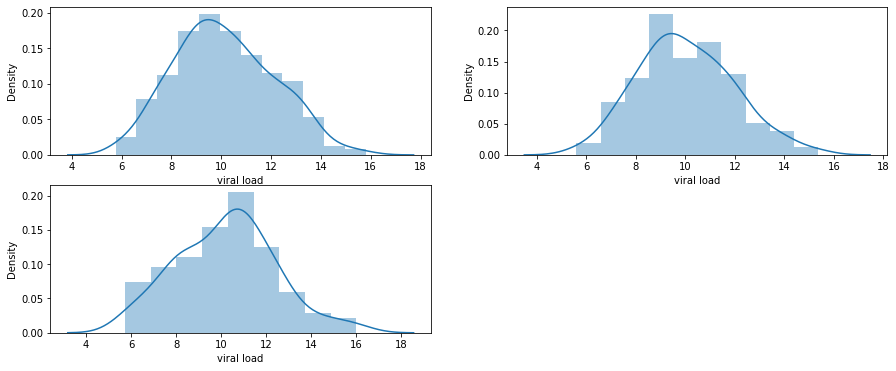

In [136]:
# check the distribution of viral load for severity level 0,1, 2
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.distplot(sl_0)
    
plt.subplot(2,2,2)
sns.distplot(sl_1)

plt.subplot(2,2,3)
sns.distplot(sl_2)

In [145]:
# One-way ANOVA test
stat, p_value = f_oneway(sl_0,sl_1,sl_2)
print('Test statistic is %f'%float("{:.6f}".format(stat)))
print('p-value for ANOVA test is %f'%p_value)
alpha = 0.05

if p_value<=alpha:
    print('Conclusion:','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.''')
else:
    print('Conclusion:','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. We conclude that mean of women's viral load with severity level 0,1,2 is same''')

Test statistic is 0.335506
p-value for ANOVA test is 0.715119
Conclusion: Since p-value(=0.715119) > alpha(=0.05) We do not reject the null hypothesis H0. We conclude that mean of women's viral load with severity level 0,1,2 is same


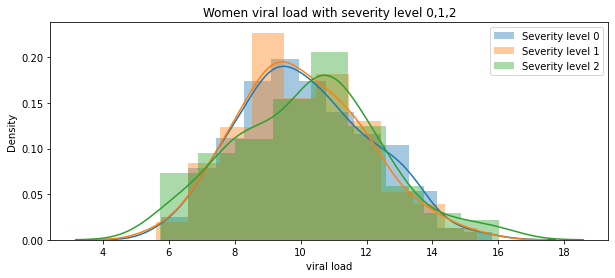

In [138]:
# reconfrim with visualyzing the distribution of all the severity level in one plot to compare
f, ax = plt.subplots( figsize = (10,4) )  
sns.distplot(sl_0, ax = ax, label = "Severity level 0")
sns.distplot(sl_1, ax = ax, label = "Severity level 1")
sns.distplot(sl_2, ax = ax, label = "Severity level 2")
plt.title("Women viral load with severity level 0,1,2")
plt.legend()  
plt.show()

In [139]:
# reconfirm with levene test
levene(sl_0,sl_1,sl_2)

LeveneResult(statistic=0.9435131022565071, pvalue=0.38987253596513605)

# `New Hypothesis testing (not asked in project):`

# `Is Smoking related to Severity level of the paitent ?`

- H0: Smoking is related to severity level.
- H1: Smoking is not-related to severity level.
- Test: Chi-sqaure
- Test statistic: 6.887720
- P-value chi-square test: 0.229126
- Conculsion: Since p-value **p-value(=0.229126) > alpha(=0.05)** 

<span style="color:red"> **We FAIL to reject the null hypothesis H0.**</span>
    
<span style="color:red">**We conclude that Smoking is RELATED to Severity level**</span>

In [140]:
# create crosstab for chi-square test
ct1 = pd.crosstab(data["smoker"], data["severity level"])
ct1

severity level,0,1,2,3,4,5
smoker,,,,,,
no,459,263,185,118,22,17
yes,115,61,55,39,3,1


In [148]:
# chi-square test for categorical variables/attributes 
stat, p_value, dof, expected = chi2_contingency(ct1)
print('Test statistic is %f'%float("{:.6f}".format(stat)))
print('p-value for Chi-Square test is %f'%p_value)
alpha = 0.05

if p_value<=alpha:
    print('Conclusion:','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.''')
else:
    print('Conclusion:','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')

Test statistic is 6.887720
p-value for Chi-Square test is 0.229126
Conclusion: Since p-value(=0.229126) > alpha(=0.05) We do not reject the null hypothesis H0.


# `Recommendations:`
**Smoker:**
- Smoker take longer to recover and hence the hospitalization charges are higher in smokers.
- Government shall take some considerate actions on tobacco manufacturing and consumption.
- Once the paitent comes for treatment the first question shall be is he/she a smoker or not.
- There shall be separate/different treatments for smoker which will help in faster recovery

**Age:**
- People from age group 32-39yrs are more likely to get affected with covid.
- Corporates and social groups shall be activated to run campaigns on health and immunity boosting.

**Region:**
- Southeast is the highest affected region and hence the hospitalization charges are higher in this region.
- Second highest can be seen in Southwest region.
- South Delhi is highly affected region
- South Delhi has most of the migrants and hence there more chances of carrting virus while travelling.
- Accurate testing on arrival of train, bus, flights, state border shall be made.

**Hospitalization charges:**
- Smokers, migrants and people from age group 32-39yrs are recommeded to buy higher medical insurance plan to avoid unforseen disease and pandemic breakout like Covid-19